In [564]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [615]:
filename = '../../savior_bags/13_pics/6.jpg'
im1 = cv2.imread(filename) #reads BGR

In [616]:
#BREITE DER ENTE EVT AUSNUTZEN!!!

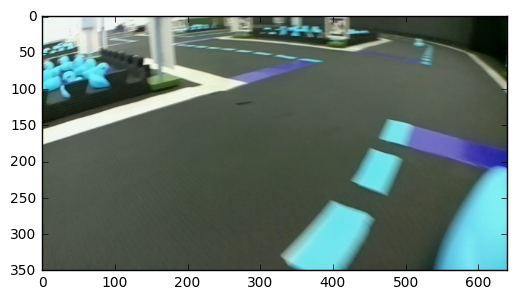

In [617]:
#im1 = im1[:,:,::-1]
#or using OpenCV conventions:
# im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
# plt.imshow(im1_rgb); plt.show()
#CROPPING THE PICTURE
im1_cropped = im1[130:,:,:]
plt.imshow(im1_cropped); plt.show()

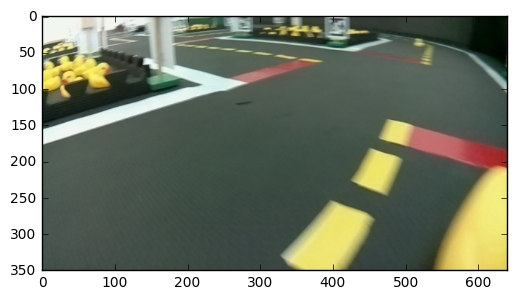

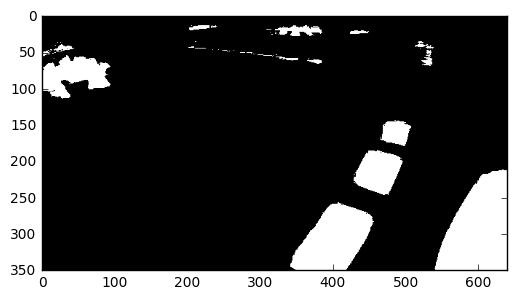

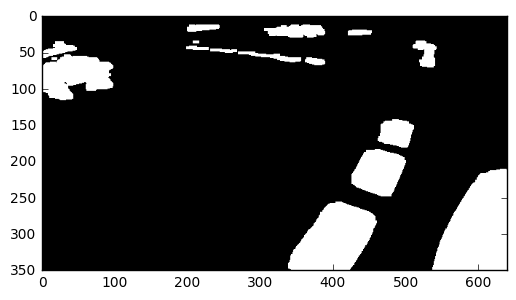

In [618]:
# Convert BGR to HSV
hsv = cv2.cvtColor(im1_cropped, cv2.COLOR_BGR2HSV)


plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)); plt.show()


lower_blue = np.array([20,75,100])
upper_blue = np.array([40,255,255])


# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
#plt.imshow(mask); plt.show()
plt.imshow(mask, cmap='gray'); plt.show()

blur2 = cv2.blur(mask,(8,4),0)
super_threshold_indices = blur2 < 1
blur2[super_threshold_indices] = 0 #wie in matlab da wo alle=1 werden sie auf 0 gesetzt!!!
super_threshold_indices = blur2 >= 1
blur2[super_threshold_indices] = 255
plt.imshow(blur2, cmap='gray'); plt.show()

In [619]:
#print "filter out large elements, eyerything smaller than 11x11 left out"
##did not work :/
#blur2 = cv2.blur(mask,(5,5),0)
#super_threshold_indices = blur2 < 1
#blur2[super_threshold_indices] = 0
#plt.imshow(blur2, cmap='gray'); plt.show()

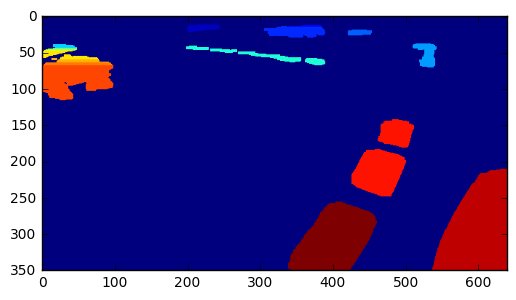

i ist gleich: 
18
105
85
  


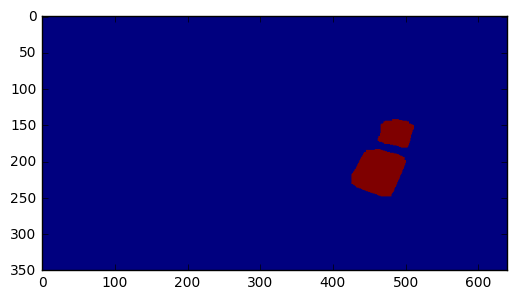

In [620]:
#A=np.nonzero(mask)
A=np.nonzero(blur2)
#print np.shape(A)
#print A
hallo=np.empty(np.shape(A),dtype=int)
hallo[0,:]=A[0]
hallo[1,:]=A[1]
#print hallo[0,:]
#print hallo[1,:]

final=np.zeros_like(mask)
#print final[14,:]
#first iteration:
i=1
j=0
final[hallo[0,j],hallo[1,j]]=i
row1=hallo[0,j]
row2=0
col1=hallo[1,j]
col2=0
a=20
b=10
check_arr=np.empty((b+1,2*a+1),dtype=int)
#SEGMENTIERUNG MUSS DEFINITIV INTELLIGENTER WERDEN!!!! -> BISHER NOCH VIEL ZU VIELE!!!! SHIIIIIT^^
for j in range(1,np.size(A,1)):
    if(final[hallo[0,j],hallo[1,j]-1]!=0): #eins nach links!
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j],hallo[1,j]-1]
    elif (final[hallo[0,j]-1,hallo[1,j]-1]!=0): #eins links und oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]-1]
    elif (final[hallo[0,j]-1,hallo[1,j]]!=0): #eins nach oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]]
    elif (final[hallo[0,j]-1,hallo[1,j]+1]!=0): #eins nach oben & rechts
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]+1]
    #jetzt abschätzung ob es sich lohnt weiterzusuchen, da Frage: ist im Bereich a pix zur Seite (nach links und rechts) b pix nach oben noch etwas?
    else:
        check_arr=final[hallo[0,j]-b:hallo[0,j],hallo[1,j]-a:hallo[1,j]+a]
        if (np.sum(check_arr > 0)>0): #then it is worth searching again
                final[hallo[0,j],hallo[1,j]]=np.max(check_arr)
            
        else: #eig hier gleich auch VORAUSWERTUNG MIT MAX,.... wäre schlauer warsch
                if (np.sum(final == i)<20):
                    final[(final == i)]=0 #do no more!!
                    final[hallo[0,j],hallo[1,j]]=i
                else:
                    i+=1
                    final[hallo[0,j],hallo[1,j]]=i

                    
plt.imshow(final); plt.show()
print "i ist gleich: " 
print i
#print final[14,:]
#print "ABC"
#print mask[14,:]


#filter only large elements!!! (many pixels!!!) MUSS TIEFENABHÄNGIG WERDEN!!!
for k in range(1,i+1): #jetzt gehts bis i!!!
    #try to evaluate the shape!!!
    B=np.copy(final)
    B[(B != k)]=0
    C=np.nonzero(B)
    #print C
    width = np.max(C[0])-np.min(C[0])
    height = np.max(C[1])-np.min(C[1])
    if (width<50 or height>100):
        final[(final == k)]=0
    else:
        print width
        print height
        print "  "

#eig box np.min breite und höhe!! if they passed the test!!!!
#print abc
plt.imshow(final); plt.show()
    

hello
0.0900800228119


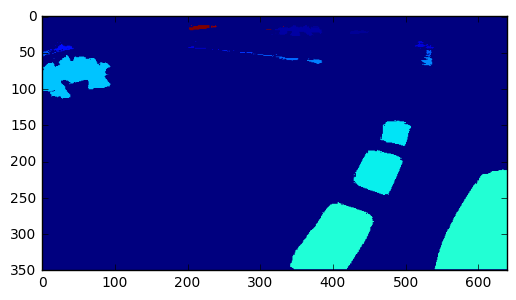

In [628]:
import time

start = time.time()
print("hello")

#DIESES MAL UNTEN RECHTS ANFANGEN!!!!
#bei mask die Randpixel auf null setzen sonst unten probleme mit den boundaries
mask[0,:]=0
mask[np.size(mask,0)-1,:]=0
mask[:,0]=0
mask[:,np.size(mask,1)-1]=0

#blur2[0,:]=0
#blur2[np.size(blur2,0)-1,:]=0
#blur2[:,0]=0
#blur2[:,np.size(blur2,1)-1]=0

A=np.nonzero(mask)
#A=np.nonzero(blur2)
#print np.shape(A)
#print A
hallo=np.empty(np.shape(A),dtype=int)
hallo[0,:]=A[0]
hallo[1,:]=A[1]
#print hallo[0,:]
#print hallo[1,:]

end_arr=np.size(hallo,1)-1


final=np.zeros_like(mask)
#print final[14,:]
#first iteration:
i=100
final[hallo[0,end_arr],hallo[1,end_arr]]=i
a=5
b=5
check_arr=np.empty((b+1,2*a+1),dtype=int)
merged=0

#SEGMENTIERUNG MUSS DEFINITIV INTELLIGENTER WERDEN!!!! -> BISHER NOCH VIEL ZU VIELE!!!! SHIIIIIT^^
for l in range(1,np.size(A,1)):
    j=end_arr-l
    
    
    if (final[hallo[0,j]+1,hallo[1,j]]!=0): #eins nach unten
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]+1,hallo[1,j]]
    elif (final[hallo[0,j]+1,hallo[1,j]+1]!=0): #eins rechts und unten
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]+1,hallo[1,j]+1]
    elif (final[hallo[0,j]+1,hallo[1,j]-1]!=0): #eins nach unten & links
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]+1,hallo[1,j]-1]
    elif(final[hallo[0,j],hallo[1,j]+1]!=0): #eins nach rechts!
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j],hallo[1,j]+1]
    #jetzt abschätzung ob es sich lohnt weiterzusuchen, da Frage: ist im Bereich a pix zur Seite (nach links und rechts) b pix nach oben noch etwas?
    #else:
    #    check_arr=final[hallo[0,j]+b:hallo[0,j],hallo[1,j]-a:hallo[1,j]+a]
    #    if(np.sum(check_arr > 0)>0): #then it is worth searching again
    #        final[hallo[0,j],hallo[1,j]]=np.max(check_arr)
            
    #    else: #eig hier gleich auch VORAUSWERTUNG MIT MAX,.... wäre schlauer warsch
    #            if (np.sum(final == i)<20):
    #                final[(final == i)]=0 #do no more!!
    #                final[hallo[0,j],hallo[1,j]]=i
    else:
        i-=1
        final[hallo[0,j],hallo[1,j]]=i
    if (final[hallo[0,j],hallo[1,j]]!=final[hallo[0,j],hallo[1,j]+1] and final[hallo[0,j],hallo[1,j]+1]!=0): #d.h. es gab überlapp in anderen bereich!!!!
        final[(final == final[hallo[0,j],hallo[1,j]+1])]=final[hallo[0,j],hallo[1,j]]
        merged+=1
                    
#plt.imshow(final); plt.show()
#print "i ist gleich: " 
#print 100-i-merged
#print final[14,:]
#print "ABC"
#print mask[14,:]


#filter only large elements!!! (many pixels!!!) MUSS TIEFENABHÄNGIG WERDEN!!!
#for k in range(1,i+1): #jetzt gehts bis i!!!
#    #try to evaluate the shape!!!
#    B=np.copy(final)
#    B[(B != k)]=0
#    C=np.nonzero(B)
#    #print C
#    width = np.max(C[0])-np.min(C[0])
#    height = np.max(C[1])-np.min(C[1])
#    if (width<50 or height>100):
#        final[(final == k)]=0
#    else:
#        print width
#        print height
#        print "  "

#eig box np.min breite und höhe!! if they passed the test!!!!
#print abc
end = time.time()
print(end - start)
plt.imshow(final); plt.show()

348
638


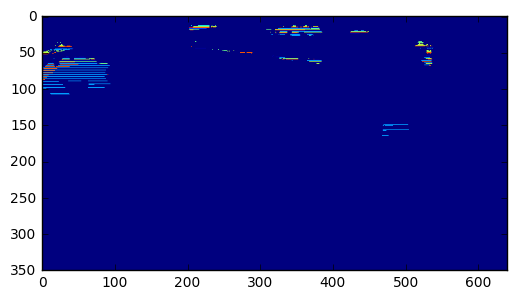

i ist gleich: 
735


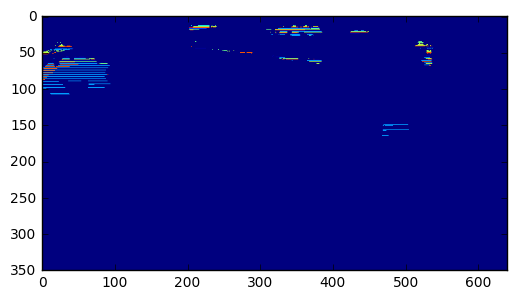

In [622]:
#DIESES MAL UNTEN RECHTS ANFANGEN UND MEHR EFFIZIENZ PROBIEREN!!!
#bei mask die Randpixel auf null setzen sonst unten probleme mit den boundaries
mask[0,:]=0
mask[np.size(mask,0)-1,:]=0
mask[:,0]=0
mask[:,np.size(mask,1)-1]=0

blur2[0,:]=0
blur2[np.size(blur2,0)-1,:]=0
blur2[:,0]=0
blur2[:,np.size(blur2,1)-1]=0

A=np.nonzero(mask)
#A=np.nonzero(blur2)
#print np.shape(A)
#print A
hallo=np.empty(np.shape(A),dtype=int)
hallo[0,:]=A[0]
hallo[1,:]=A[1]
#print hallo[0,:]
#print hallo[1,:]

end_arr=np.size(hallo,1)-1


final=np.zeros_like(mask)
#print final[14,:]
#first iteration:
i=100
final[hallo[0,end_arr],hallo[1,end_arr]]=i
print hallo[0,end_arr]
print hallo[1,end_arr]
a=1
b=1
check_arr=np.empty((b+1,2*a+1),dtype=int)
merged=0

#SEGMENTIERUNG MUSS DEFINITIV INTELLIGENTER WERDEN!!!! -> BISHER NOCH VIEL ZU VIELE!!!! SHIIIIIT^^
for l in range(1,np.size(A,1)):
    j=end_arr-l
    
    check_arr=final[hallo[0,j]+b:hallo[0,j],hallo[1,j]-a:hallo[1,j]+a]
    if(np.sum(check_arr > 0)>0): #then it is worth searching again
            final[hallo[0,j],hallo[1,j]]=np.max(check_arr)

            
    #    else: #eig hier gleich auch VORAUSWERTUNG MIT MAX,.... wäre schlauer warsch
    #            if (np.sum(final == i)<20):
    #                final[(final == i)]=0 #do no more!!
    #                final[hallo[0,j],hallo[1,j]]=i
    else:
        i-=1
        final[hallo[0,j],hallo[1,j]]=i
    if (final[hallo[0,j],hallo[1,j]]!=final[hallo[0,j],hallo[1,j]+1] and final[hallo[0,j],hallo[1,j]+1]!=0): #d.h. es gab überlapp in anderen bereich!!!!
        final[(final == final[hallo[0,j],hallo[1,j]+1])]=final[hallo[0,j],hallo[1,j]]
        merged+=1
                    
plt.imshow(final); plt.show()
print "i ist gleich: " 
print 100-i-merged
#print final[14,:]
#print "ABC"
#print mask[14,:]


#filter only large elements!!! (many pixels!!!) MUSS TIEFENABHÄNGIG WERDEN!!!
#for k in range(1,i+1): #jetzt gehts bis i!!!
#    #try to evaluate the shape!!!
#    B=np.copy(final)
#    B[(B != k)]=0
#    C=np.nonzero(B)
#    #print C
#    width = np.max(C[0])-np.min(C[0])
#    height = np.max(C[1])-np.min(C[1])
#    if (width<50 or height>100):
#        final[(final == k)]=0
#    else:
#        print width
#        print height
#        print "  "

#eig box np.min breite und höhe!! if they passed the test!!!!
#print abc
plt.imshow(final); plt.show()
    

In [ ]:
#VORHERIGE BRUTE FORCE IMPLEMENTIERUNG!!!
#A=np.nonzero(mask)
A=np.nonzero(blur2)
#print np.shape(A)
#print A
hallo=np.empty(np.shape(A),dtype=int)
hallo[0,:]=A[0]
hallo[1,:]=A[1]
#print hallo[0,:]
#print hallo[1,:]

final=np.zeros_like(mask)
#print final[14,:]
#first iteration:
i=1
j=0
final[hallo[0,j],hallo[1,j]]=i
row1=hallo[0,j]
row2=0
col1=hallo[1,j]
col2=0
#SEGMENTIERUNG MUSS DEFINITIV INTELLIGENTER WERDEN!!!! -> BISHER NOCH VIEL ZU VIELE!!!! SHIIIIIT^^
for j in range(1,np.size(A,1)):
    if(final[hallo[0,j],hallo[1,j]-1]!=0): #eins nach links!
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j],hallo[1,j]-1]
    elif (final[hallo[0,j]-1,hallo[1,j]-1]!=0): #eins links und oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]-1]
    elif (final[hallo[0,j]-1,hallo[1,j]]!=0): #eins nach oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]]
    elif (final[hallo[0,j]-1,hallo[1,j]+1]!=0): #eins nach oben & rechts
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-1,hallo[1,j]+1]
    #jetzt alles mit 5
    elif(final[hallo[0,j],hallo[1,j]-5]!=0): #eins nach links!
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j],hallo[1,j]-5]
    elif (final[hallo[0,j]-5,hallo[1,j]-5]!=0): #eins links und oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-5,hallo[1,j]-5]
    elif (final[hallo[0,j]-5,hallo[1,j]]!=0): #eins nach oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-5,hallo[1,j]]
    elif (final[hallo[0,j]-5,hallo[1,j]+5]!=0): #eins nach oben & rechts
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-5,hallo[1,j]+5]
    #jetzt alles mit 10
    elif(final[hallo[0,j],hallo[1,j]-10]!=0): #eins nach links!
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j],hallo[1,j]-10]
    elif (final[hallo[0,j]-10,hallo[1,j]-10]!=0): #eins links und oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-10,hallo[1,j]-10]
    elif (final[hallo[0,j]-10,hallo[1,j]]!=0): #eins nach oben
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-10,hallo[1,j]]
    elif (final[hallo[0,j]-10,hallo[1,j]+10]!=0): #eins nach oben & rechts
        final[hallo[0,j],hallo[1,j]]=final[hallo[0,j]-10,hallo[1,j]+10]
    else:
        i+=1
        final[hallo[0,j],hallo[1,j]]=i

plt.imshow(final); plt.show()
print "i ist gleich: " 
print i
#print final[14,:]
#print "ABC"
#print mask[14,:]

abc=0
#filter only large elements!!! (many pixels!!!)
for k in range(1,i):
    if (np.sum(final == k)<200):
        final[(final == k)]=0
    else:
        #try to evaluate the shape!!!
        abc=abc+1
        B=final
        B[(B != k)]=0
        C=np.nonzero(B)
        width = max(C[0])-min(C[0])
        print width
        height = max(C[1])-min(C[1])
        if (width<25):
            final[(final == k)]=0
        
#print abc
plt.imshow(final); plt.show()
    

In [188]:
A=np.nonzero(mask)
#print np.shape(A)
#print A
hallo=np.empty(np.shape(A),dtype=int)
hallo[0,:]=A[0]
hallo[1,:]=A[1]
#print hallo[0,:]
#print hallo[1,:]

AT=np.nonzero(np.transpose(mask))
#print np.shape(AT)
#print AT

final=np.zeros_like(mask)
#print final[14,:]
#first iteration:
i=1
j=0
final[hallo[0,j],hallo[1,j]]=i
row1=hallo[0,j]
row2=0
col1=hallo[1,j]
col2=0
for j in range(1,np.size(A,1)):
    row2=hallo[0,j]
    col2=hallo[1,j]
    if(row1==row2):
        if(col1+1==col2):
            final[hallo[0,j],hallo[1,j]]=i
        else:
            i=i+1
            final[hallo[0,j],hallo[1,j]]=i            
    else:
            i=i+1
            final[hallo[0,j],hallo[1,j]]=i
    row1=row2
    col1=col2
    
print i
print final[14,:]
print "ABC"
print mask[14,:]
    


273
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

In [124]:
#FIND OUT COLORS
#for x in range(0, 360, 10):
#    print x
#    yellow_hsv = np.uint8([[[x,20,255]]])
#    hsv2bgr = cv2.cvtColor(yellow_hsv,cv2.COLOR_HSV2RGB)
#    plt.imshow(hsv2bgr); plt.show()
#    #bgr2hsv = cv2.cvtColor(hsv2bgr,cv2.COLOR_BGR2HSV
#    #print bgr2hsv

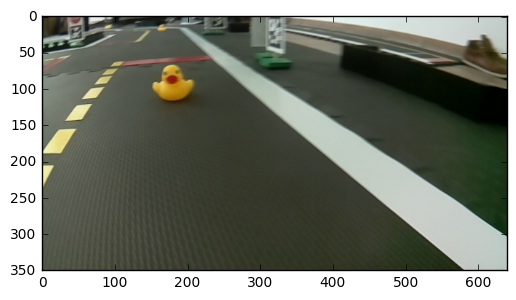

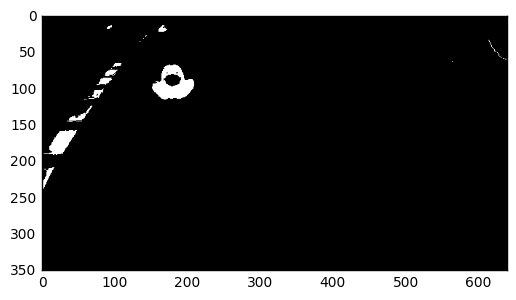

apply CORNER DETECTOR!!!


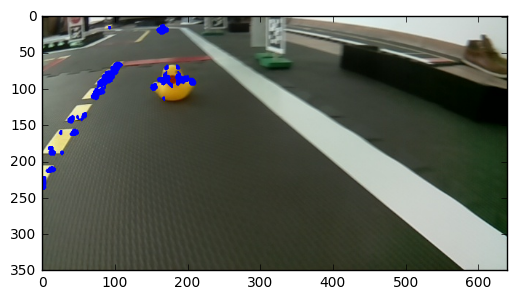

TRY TO APPLY DIFFERENT FILTER SIZES (depending on depth)


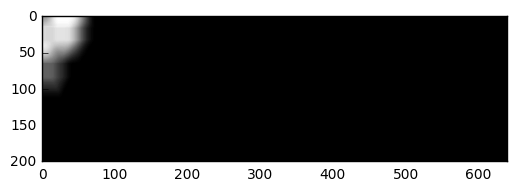

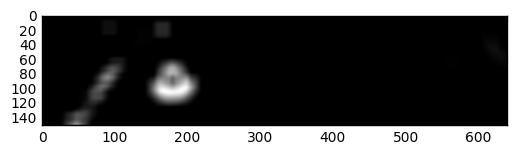

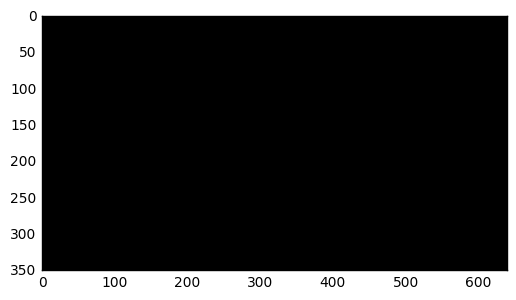

filter out large elements


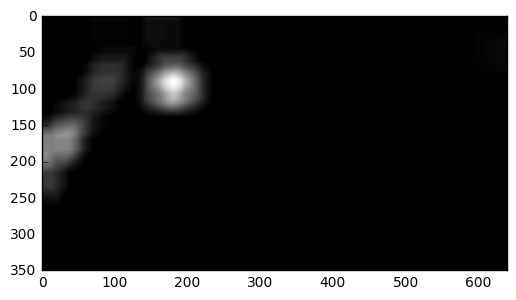

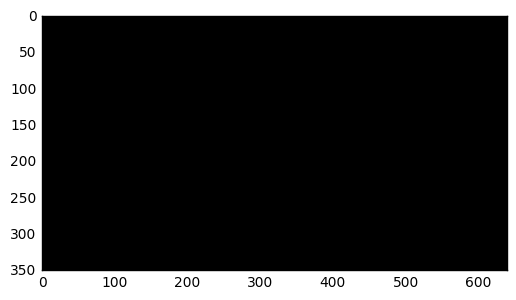

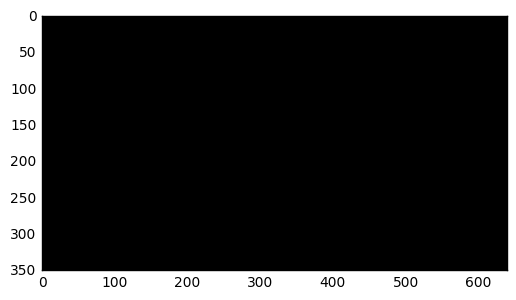

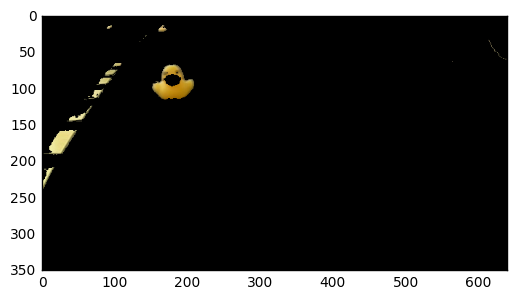

In [125]:
# Convert BGR to HSV
hsv = cv2.cvtColor(im1_cropped, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)); plt.show()

# define range of blue color in HSV
# BEST PARAMS SO FAR
#lower_blue = np.array([20,150,150])
#upper_blue = np.array([90,255,255])

lower_blue = np.array([20,75,100])
upper_blue = np.array([40,255,255])


# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
#plt.imshow(mask); plt.show()
plt.imshow(mask, cmap='gray'); plt.show()

print "apply CORNER DETECTOR!!!"
dst=cv2.cornerHarris(mask,10,21,0.04)
pic=cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
pic[dst>0.1*dst.max()]=[0,0,255]
plt.imshow(pic); plt.show()


#blur = cv2.GaussianBlur(mask,(31,31),0)
#plt.imshow(blur, cmap='gray'); plt.show()
print "TRY TO APPLY DIFFERENT FILTER SIZES (depending on depth)"
depth1 = cv2.blur(mask[150:,0:],(51,51),0)
depth2 = cv2.blur(mask[0:150,0:],(21,21),0)
plt.imshow(depth1, cmap='gray'); plt.show()
plt.imshow(depth2, cmap='gray'); plt.show()
depth3 = np.vstack((depth2,depth1))
depth3=np.array(depth3, dtype=float)
super_threshold_indices = depth3 < 250
depth3[super_threshold_indices] = 0
plt.imshow(depth3, cmap='gray'); plt.show()


print "filter out large elements"
blur2 = cv2.blur(mask,(51,51),0)
plt.imshow(blur2, cmap='gray'); plt.show()
super_threshold_indices = blur2 < 235
blur2[super_threshold_indices] = 0
plt.imshow(blur2, cmap='gray'); plt.show()
# aussenhülle der mask geht auch!!!
blur3 = cv2.GaussianBlur(mask,(51,51),0)
super_threshold_indices = blur3 < 255
blur3[super_threshold_indices] = 0
plt.imshow(blur3, cmap='gray'); plt.show()


# Bitwise-AND mask and original image
res = cv2.bitwise_and(im1_cropped,im1_cropped, mask= mask)

plt.imshow(res[:,:,::-1]); plt.show()
#cv2.imshow('im1',im1)
#cv2.imshow('mask',mask)
#cv2.imshow('res',res)
#k = cv2.waitKey(5) 
    

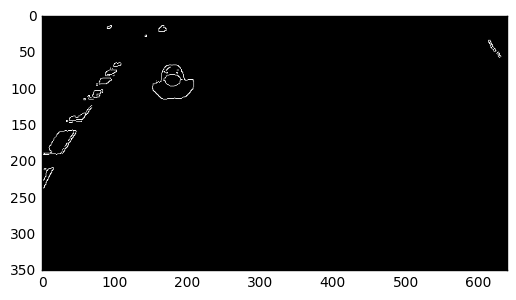

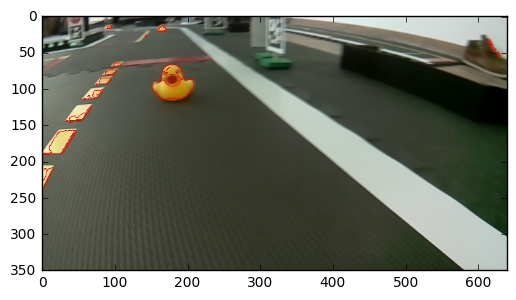

In [126]:
bilateral_filtered_image = cv2.bilateralFilter(res, 5, 175, 175)
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
backtorgb = cv2.cvtColor(edge_detected_image,cv2.COLOR_GRAY2RGB)
#im4 = backtorgb+im1_cropped
plt.imshow(edge_detected_image, cmap='gray'); plt.show()
#plt.imshow(im4); plt.show()

pic=cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
pic[edge_detected_image>0.9*edge_detected_image.max()]=[255,0,0]
plt.imshow(pic); plt.show()

In [46]:
A=np.nonzero(edge_detected_image)
print np.shape(A)


(2, 1502)


In [ ]:
_, contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

cv2.drawContours(im1_cropped, contour_list,  -1, (255,0,0), 2)
cv2.imshow('Objects Detected',im1_cropped)
cv2.waitKey(0)

In [ ]:
#TODO:
# BILD SAUBER SPEICHERN!!!!
# try to filter out too small objects -> step1
# try to infer the middle of each remaining object!!!
# eventuell nach hinten kleiner machen!!! da hinten alles kleiner ist!!!
# propably ransac middle line^^
# eventually as first step only take largest object
# hinten noch mehr  uncertainity auf Objekte die weit weg sind!!!

Where is the transparency?

In [ ]:
im2_bgra = cv2.imread(filename, cv2.IMREAD_UNCHANGED)

In [ ]:
print im2_bgra.shape

In [ ]:
im2_rgba =  cv2.cvtColor(im2_bgra, cv2.COLOR_BGRA2RGBA)

In [ ]:
plt.imshow(im2_rgba); plt.show()

In [ ]:
print im2_rgba.shape

In [ ]:
mask = im2_rgba[:,:,3]

In [ ]:
plt.imshow(mask, cmap='gray'); plt.show()

In [ ]:
plt.imshow(mask[500:700, 500:700], cmap='gray'); plt.show()

In [ ]:
alpha = mask / 255.0
beta = 1.0 - alpha

In [ ]:
background_bgr = cv2.imread('data/bg.jpg')
background_rgb = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)
H, W, _ = im2_rgba.shape
bg = cv2.resize(background_rgb, (W, H))

plt.imshow(bg); plt.show()

In [ ]:
funky_rgb = np.zeros(dtype='uint8', shape=(height, width, 3))

In [ ]:
for i in [0, 1, 2]:
    funky_rgb[:, :, i] =  im2_rgba[:,:,i] * alpha + bg[:,:,i] * (1-alpha)

In [ ]:
plt.imshow(funky_rgb); plt.show()

In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)